In [1]:
import pandas as pd

In [2]:
import os 
data = {
    'air_visit_data':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/air_visit_data.csv.zip'),
    'air_store_info':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/air_store_info.csv.zip'),
    'hpg_store_info':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/hpg_store_info.csv.zip'),
    'air_reserve':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/air_reserve.csv.zip'),
    'hpg_reserve':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/hpg_reserve.csv.zip'),
    'store_id_relation':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/store_id_relation.csv.zip'),
    'sample_submission':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/sample_submission.csv.zip'),
    'date_info':
    pd.read_csv(f'{os.getenv("HOME")}/Study/Github_Project/AIFFEL/hackton/data/date_info.csv.zip')
}

In [4]:
data['sample_submission'].head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


* id: air id+YYYY-mm-dd
* visitors: 예상되는 방문자의 수

* 전체기간 예약자와 방문자수 추이
* 2016년 내 월별 방문자수 -> lineplot, barchart
* 휴일일때 시간대별 방문자수
* 휴일이 아닐 때 시간대별 방문자수
* 예약자 수와 실제 방문자 수의 관계
* genre와 방문자 수의 관계

In [61]:
data['air_visit_data'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [21]:
def split_date_time(df):
    result = df.copy()
    if 'visit_datetime' in result.columns:
        result.loc[:,'visit_datetime'] = pd.to_datetime(result['visit_datetime'])
        result.loc[:,'visit_date']  = [str(d.date()) for d in result['visit_datetime']]       
        result.loc[:,'visit_time']  = [str(d.time()) for d in result['visit_datetime']]       
    if 'reserve_datetime' in df.columns:
        result.loc[:,'reserve_datetime'] = pd.to_datetime(result['reserve_datetime'])
        result.loc[:,'reserve_date']  = [str(d.date()) for d in result['reserve_datetime']]       
        result.loc[:,'reserve_time']  = [str(d.time()) for d in result['reserve_datetime']]
        
    if 'visit_date' in result.columns:
        result = pd.merge(result, data['date_info'], how='inner', left_on='visit_date', right_on='calendar_date')
    if 'reserve_date' in result.columns:
        result = pd.merge(result,data['date_info'],how='inner', left_on='reserve_date', right_on='calendar_date')
    return result

# 2016년도 air 방문자 수

In [66]:
air_visit_group = split_date_time(data['air_visit_data'])
air_visit_group.loc[:,'visit_date'] = pd.to_datetime(air_visit_group['visit_date'])
air_visit_group['visit_year'] = pd.Series(air_visit_group.visit_date.dt.year)
air_visit_group['visit_month']  = pd.Series(air_visit_group.visit_date.dt.month)
air_visit_group['visit_day'] = pd.Series(air_visit_group.visit_date.dt.day)

In [69]:
air_visit_group

,air_store_id,visit_date,visitors,calendar_date,day_of_week,holiday_flg,visit_year,visit_month,visit_day
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,2016,1,13
1,air_25e9888d30b386df,2016-01-13,21,2016-01-13,Wednesday,0,2016,1,13
2,air_fd6aac1043520e83,2016-01-13,40,2016-01-13,Wednesday,0,2016,1,13
3,air_64d4491ad8cdb1c6,2016-01-13,5,2016-01-13,Wednesday,0,2016,1,13
4,air_ee3a01f0c71a769f,2016-01-13,18,2016-01-13,Wednesday,0,2016,1,13
...,...,...,...,...,...,...,...,...,...
252103,air_dfad598ff642dab7,2016-01-02,25,2016-01-02,Saturday,1,2016,1,2
252104,air_db4b38ebe7a7ceff,2016-01-02,9,2016-01-02,Saturday,1,2016,1,2
252105,air_232dcee6f7c51d37,2016-01-02,9,2016-01-02,Saturday,1,2016,1,2
252106,air_3b6438b125086430,2016-01-02,8,2016-01-02,Saturday,1,2016,1,2


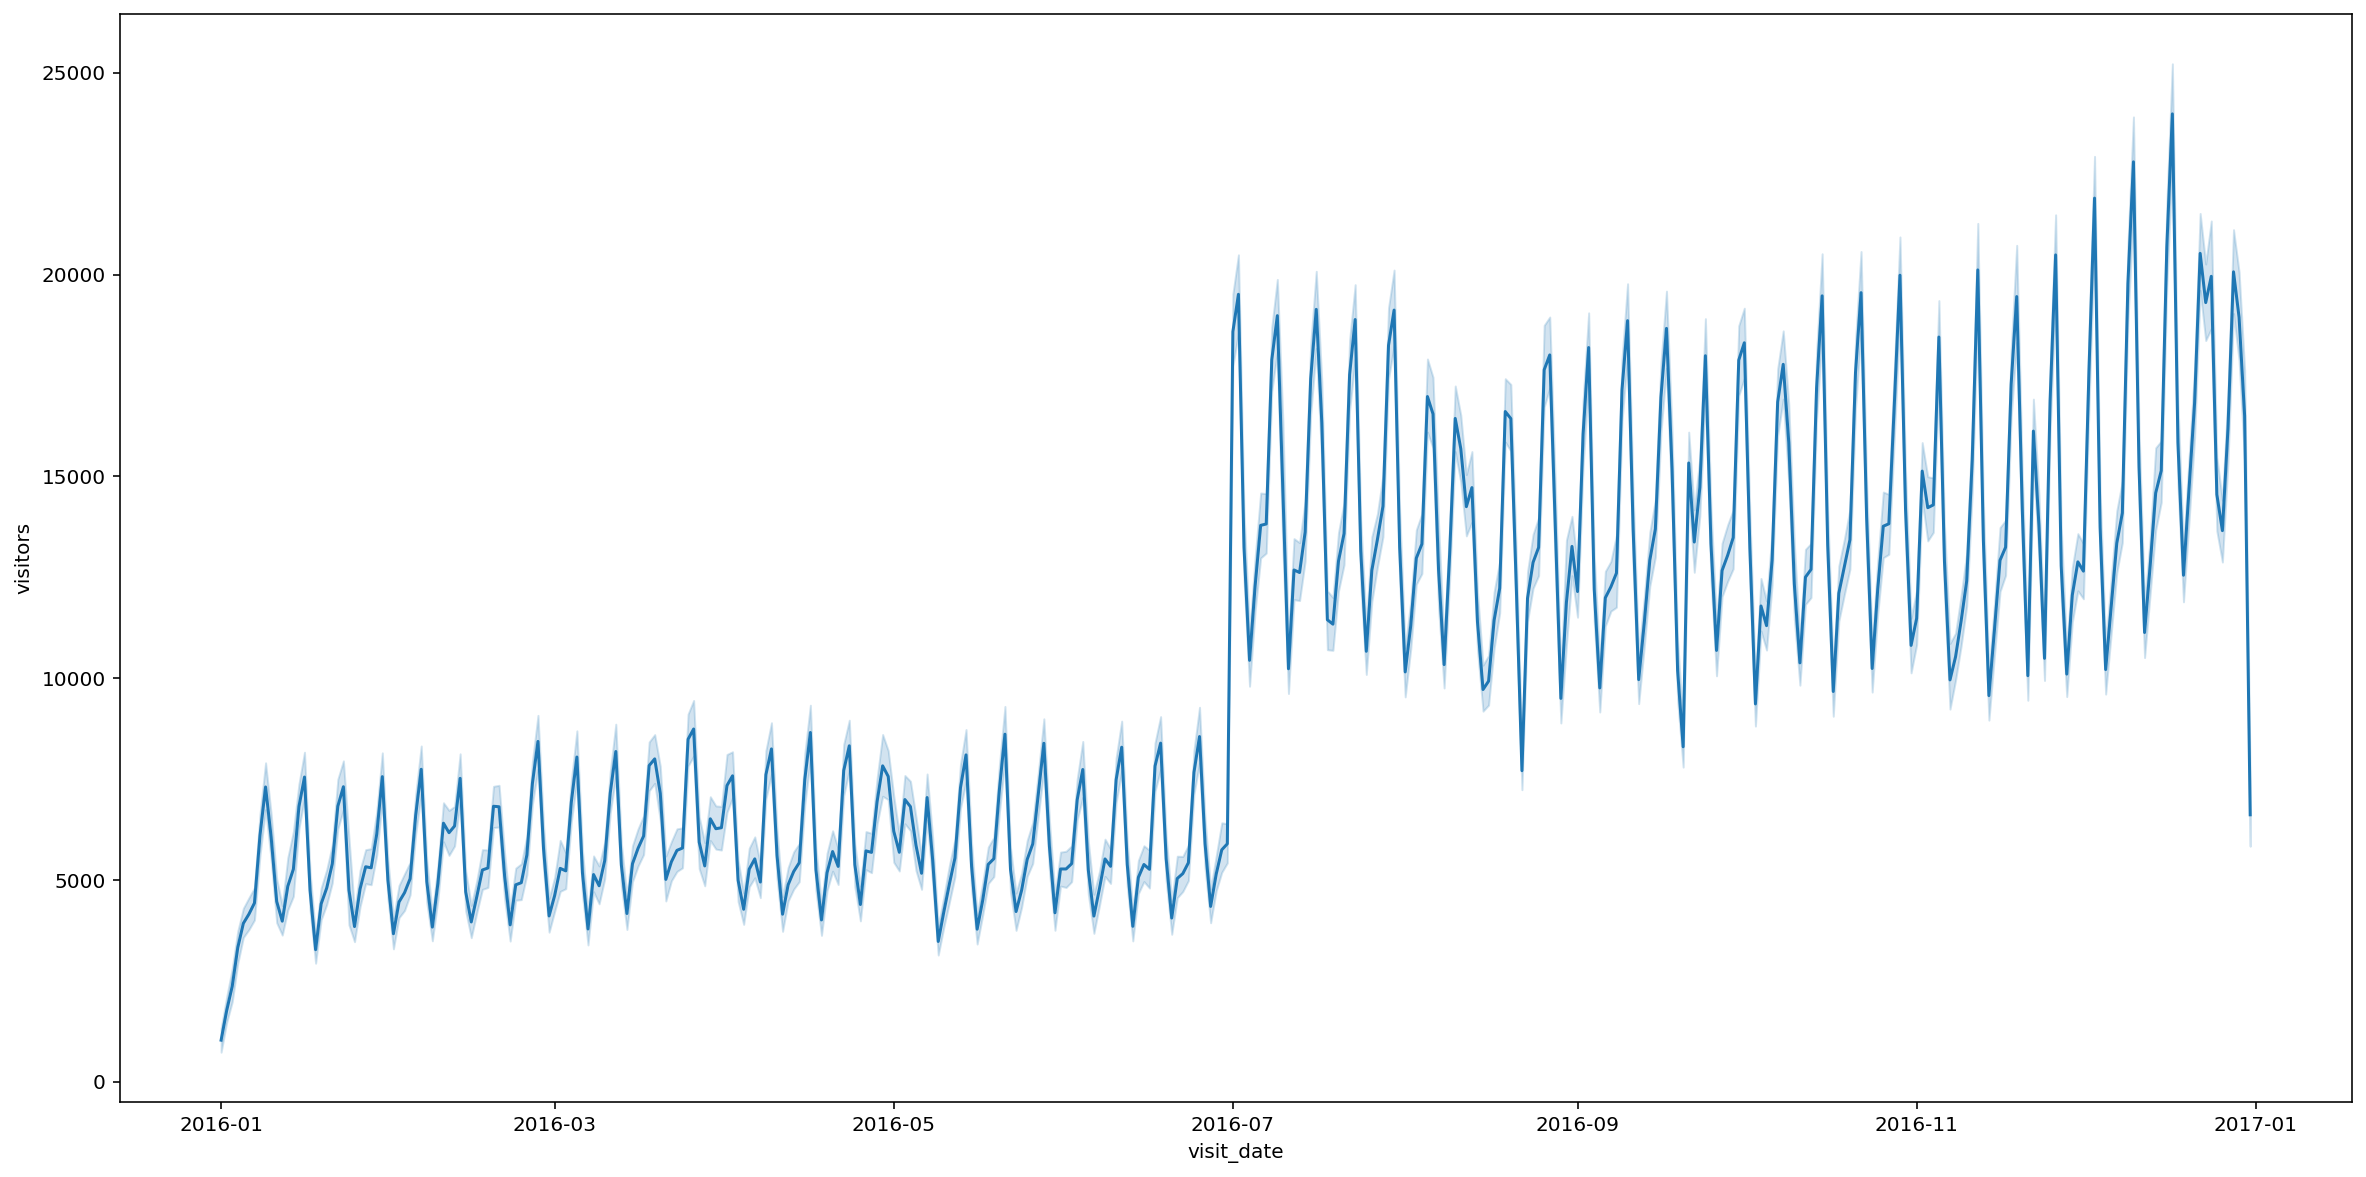

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.lineplot(data = air_visit_group[air_visit_group.visit_year==2016], x='visit_date', y='visitors', estimator=sum)
plt.show()

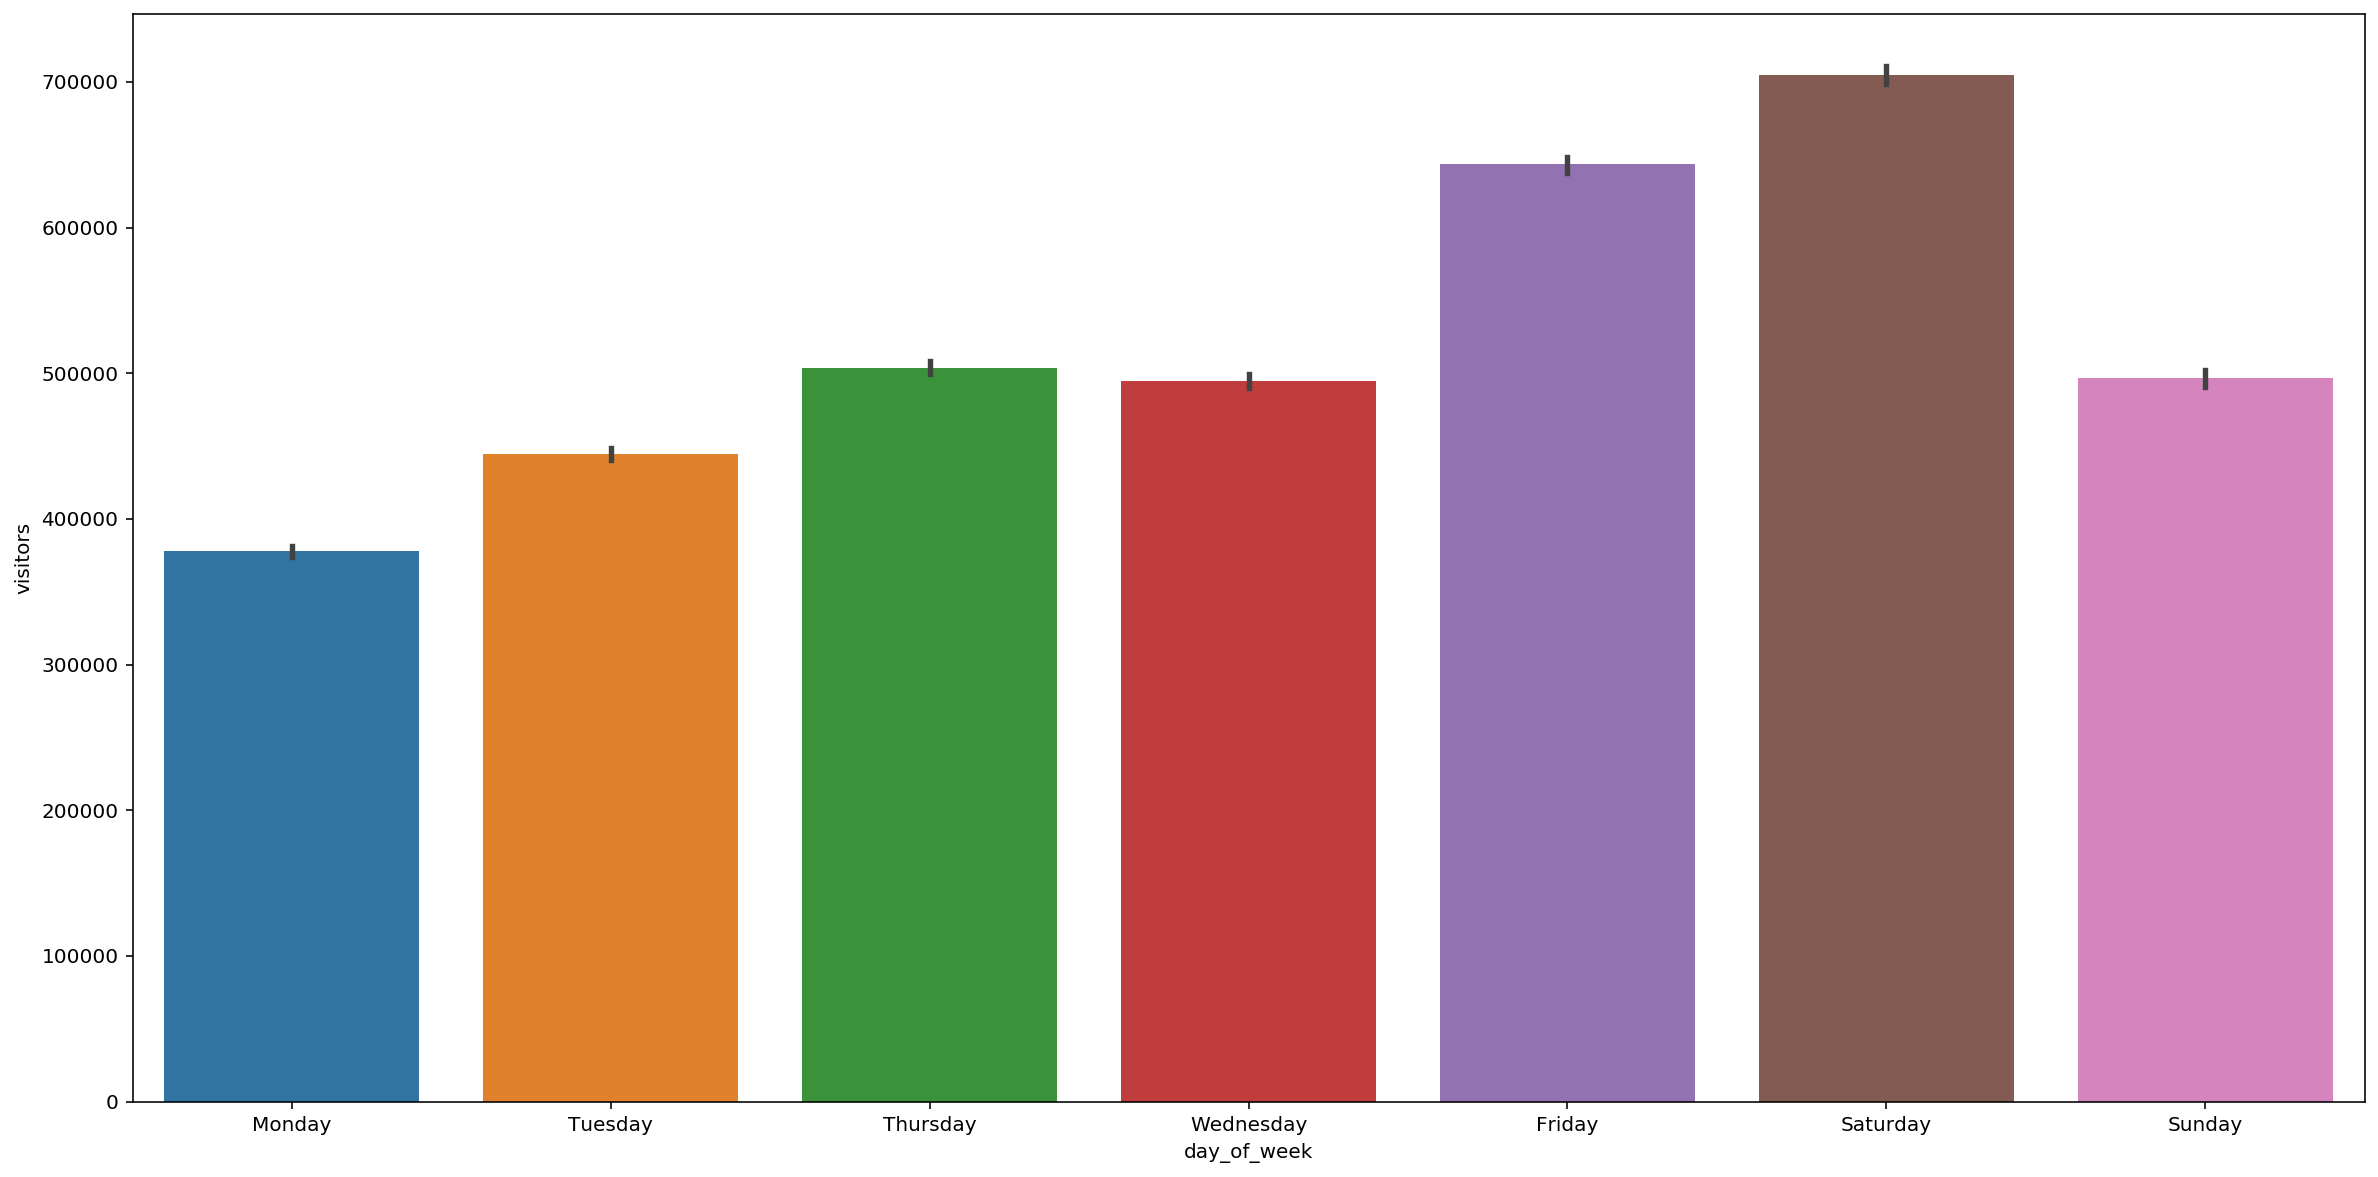

In [100]:
m = ['Monday', 'Tuesday', 'Thursday', 'Wednesday','Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20,10))
sns.barplot(data = air_visit_group[air_visit_group.visit_year==2016], x='day_of_week', y='visitors', estimator=sum, order=m)
plt.show()

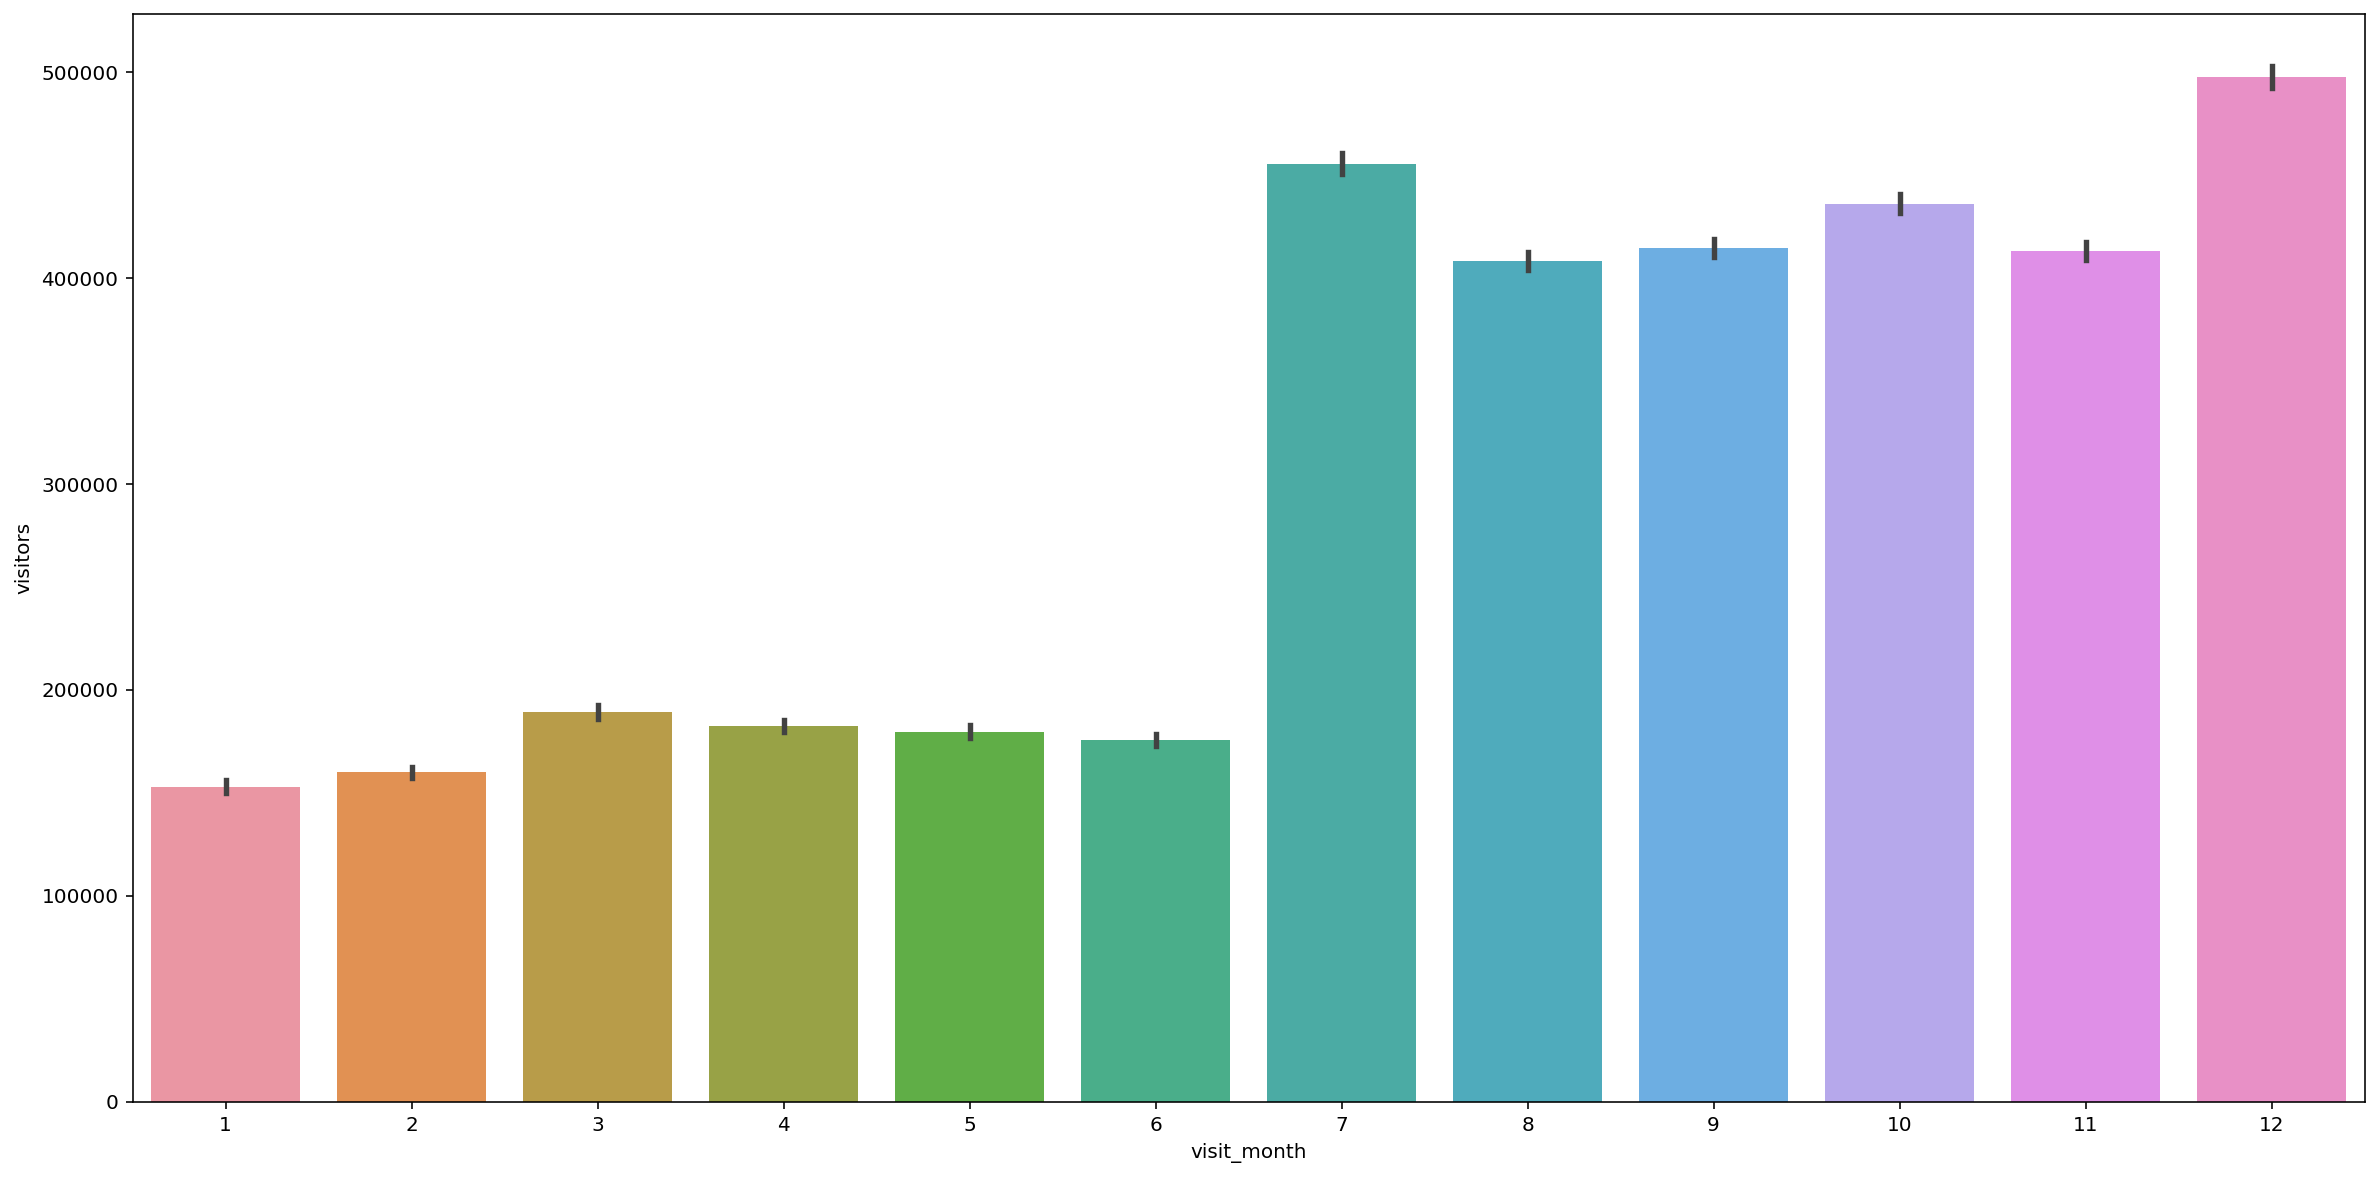

In [101]:
plt.figure(figsize=(20,10))
sns.barplot(data = air_visit_group[air_visit_group.visit_year==2016], x='visit_month', y='visitors', estimator=sum)
plt.show()

# 2016년도 air 예약자 수

In [83]:
air_visit_group.loc[air_visit_group.holiday_flg==1, 'visit_date']

6274     2016-02-11
6275     2016-02-11
6276     2016-02-11
6277     2016-02-11
6278     2016-02-11
            ...    
252103   2016-01-02
252104   2016-01-02
252105   2016-01-02
252106   2016-01-02
252107   2016-01-02
Name: visit_date, Length: 12775, dtype: datetime64[ns]

In [99]:
sorted(m)

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']